In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Reading in the data from the teams excel spreading and then data cleaning
df = pd.read_excel(r'C:\Users\ap2614\OneDrive - University of Bath\Documents\Investment and Trading\Asset Class Allocation QUANT - SM.xlsx', skiprows = 18, nrows=10, usecols='B:O')
df = df.drop(df.columns[10], axis=1)
df = df.rename(columns={7:'Client Risk Appeitite'})
df['Client Risk Adjusted Expected Return'] = df['Client Risk Appeitite'].round(decimals=4)*100
df

,Portfolio,Developed Equity,EM Equity,Real Estate,Commidities,Domestic gov bond,Global Gov Bond,Investment grade,High yield,Cash,Expected Portfolio Return,Portfolio Risk,Client Risk Appeitite,Client Risk Adjusted Expected Return
0,1,0.65,0.050,0.100,0.050,0.05,0.05,0.000,0.05,0.00,0.042750,0.149356,0.021413,2.14
1,2,0.60,0.050,0.050,0.100,0.05,0.05,0.000,0.05,0.05,0.041675,0.139614,0.021730,2.17
2,3,0.55,0.100,0.050,0.050,0.10,0.05,0.050,0.05,0.00,0.041125,0.136102,0.021682,2.17
3,4,0.50,0.050,0.100,0.050,0.10,0.05,0.050,0.05,0.05,0.039425,0.123716,0.021751,2.18
4,5,0.50,0.050,0.050,0.100,0.05,0.05,0.000,0.10,0.10,0.039600,0.125922,0.021611,2.16
5,6,0.45,0.075,0.100,0.075,0.05,0.05,0.050,0.05,0.10,0.039288,0.123866,0.021592,2.16
6,7,0.45,0.000,0.075,0.100,0.10,0.05,0.075,0.05,0.10,0.037663,0.107640,0.022285,2.23
7,8,0.40,0.050,0.100,0.050,0.15,0.05,0.050,0.05,0.10,0.036975,0.119010,0.019974,2.00
8,9,0.30,0.050,0.100,0.100,0.10,0.10,0.050,0.05,0.15,0.035650,0.095680,0.021981,2.20
9,10,0.20,0.100,0.050,0.050,0.15,0.15,0.050,0.10,0.15,0.032650,0.079907,0.021235,2.12


<AxesSubplot:title={'center':'Risk/Return Analysis'}, xlabel='Portfolio Risk', ylabel='Expected Portfolio  Return'>

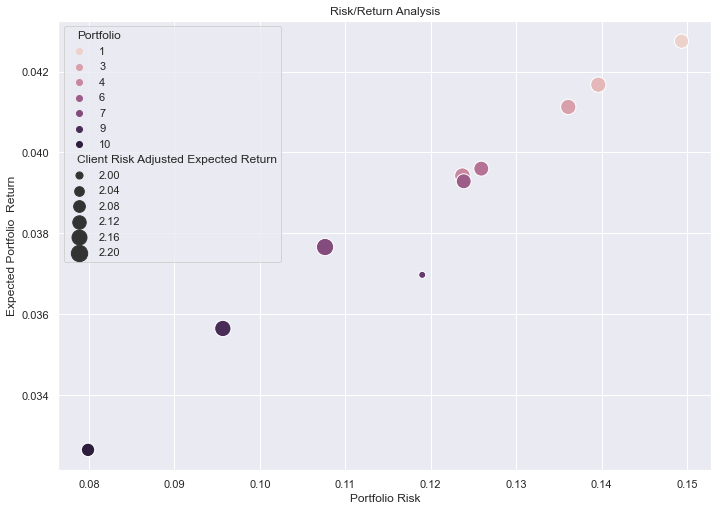

In [9]:
# data visualisation
# Graphing Expected Portfolio Return against Portfolio Risk with dot size being derived from Client Risk Adjusted Expected Return
# Bigger the dot the better the portfolio matches our clients risk profile
plt.title("Risk/Return Analysis")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(
    data=df, x="Portfolio Risk", y='Expected Portfolio  Return',sizes=(50,300), size="Client Risk Adjusted Expected Return",  hue="Portfolio",
    legend = "brief"
)



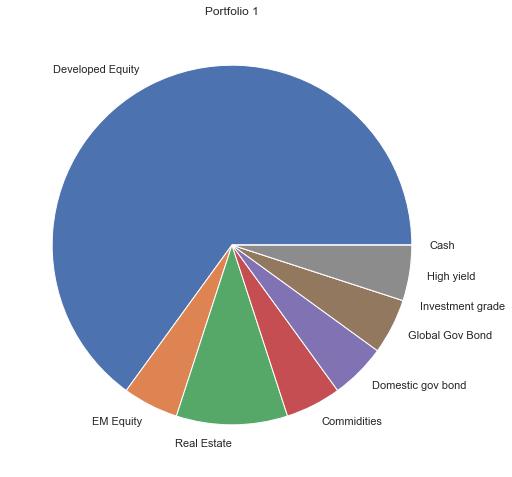

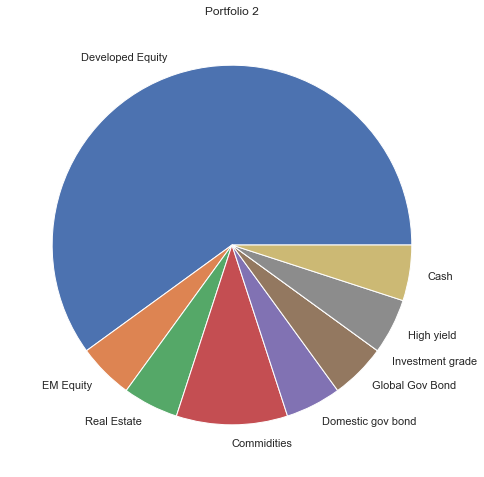

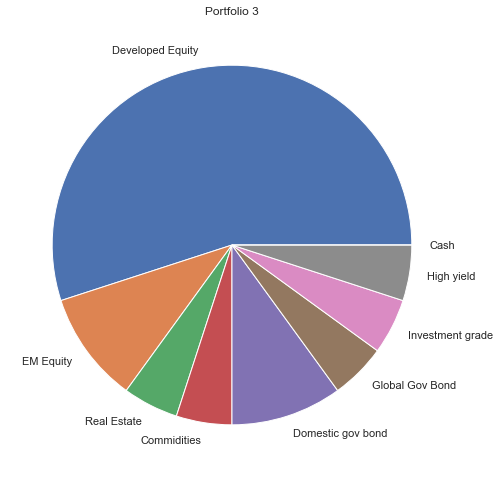

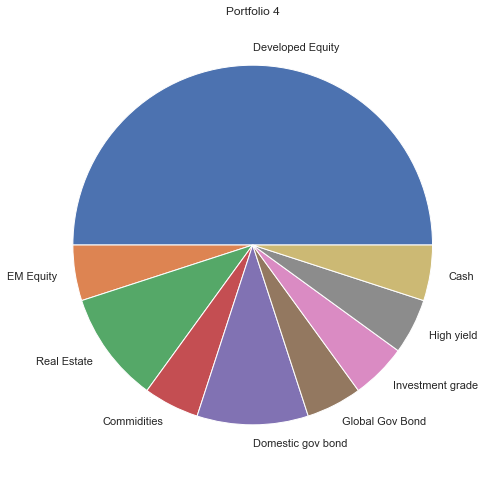

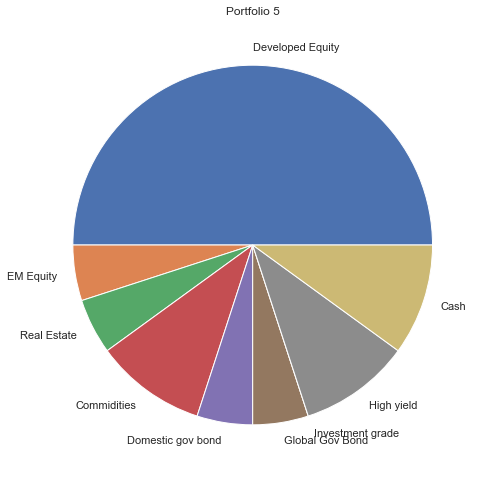

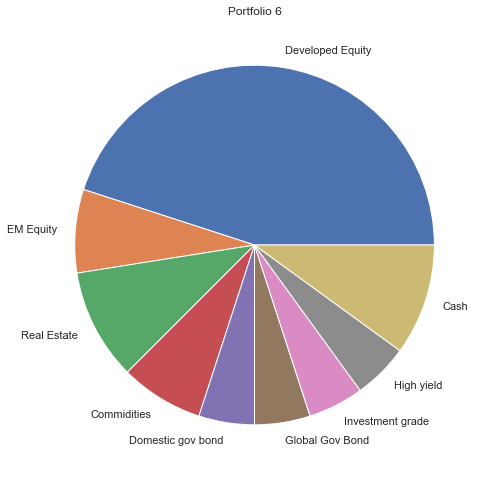

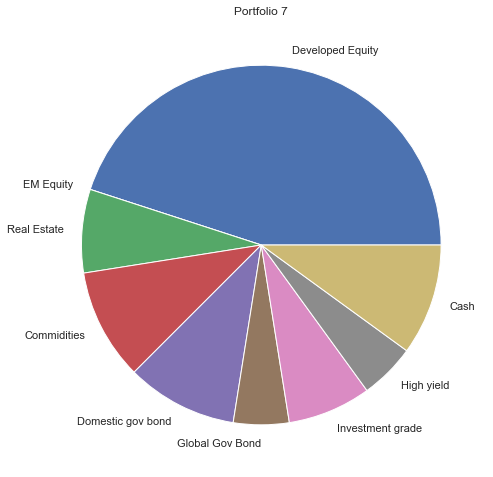

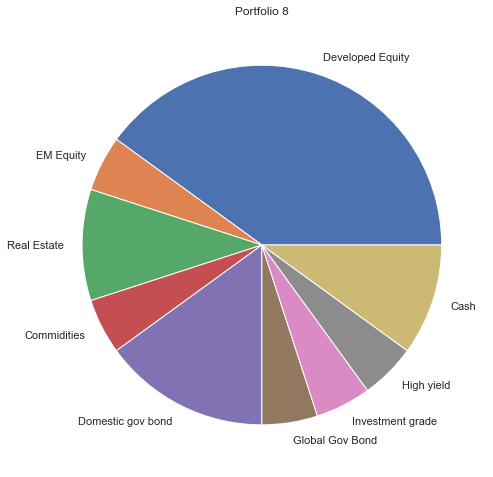

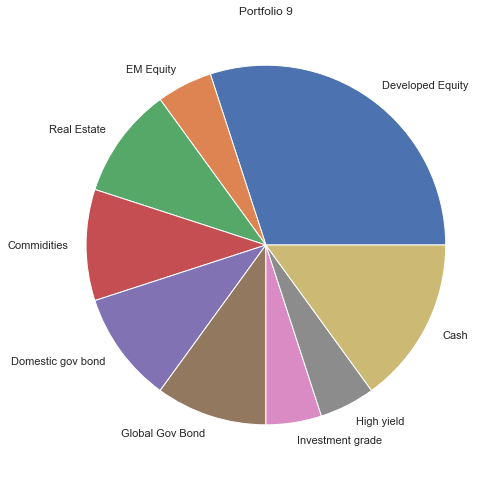

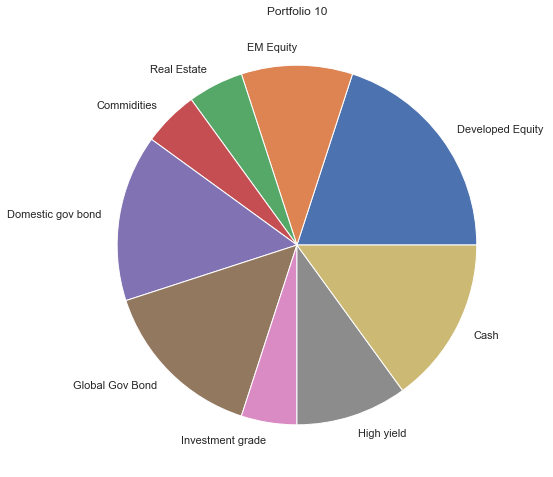

In [25]:
# Pie Chart for each portfolio outlining all the components (Real Estate, Equity...)
df2 = df.drop(df.columns[10:], axis=1)


for i in range(10):
    plt.figure(i+1)
    colors = sns.color_palette('bright')[0:5]
    plt.pie(df2.iloc[i,1:],labels=df2.columns[1:])
    plt.title(f"Portfolio {i+1}")

In [43]:
# Reading in Sector Correlation Dataset
Correlation_df = pd.read_excel(r'C:\Users\ap2614\OneDrive - University of Bath\Documents\Investment and Trading\Asset Class Allocation QUANT - SM.xlsx', skiprows = 4 , nrows=9, usecols='K:S')
# Changing row indexs to match column names for purposes of clarity
Correlation_df.index = Correlation_df.columns
Correlation_df

,Developed Equity,EM Equity,Real Estate,Commidities,Domestic gov bond,Global Gov Bond,Investment grade,High yield,Cash
Developed Equity,1.0,0.8,0.7,0.4,-0.2,-0.2,0.2,0.7,0.1
EM Equity,0.8,1.0,0.6,0.6,-0.1,-0.2,0.3,0.7,0.0
Real Estate,0.7,0.6,1.0,0.3,0.0,0.0,0.3,0.7,-0.1
Commidities,0.4,0.6,0.3,1.0,-0.1,-0.2,0.1,0.4,0.0
Domestic gov bond,-0.2,-0.1,0.0,-0.1,1.0,0.8,0.1,0.0,0.2
Global Gov Bond,-0.2,-0.2,0.0,-0.2,0.8,1.0,0.3,-0.1,0.1
Investment grade,0.2,0.3,0.3,0.1,0.1,0.3,1.0,0.7,-0.1
High yield,0.7,0.7,0.7,0.4,0.0,-0.1,0.7,1.0,-0.1
Cash,0.1,0.0,-0.1,0.0,0.2,0.1,-0.1,-0.1,1.0


<AxesSubplot:title={'center':'Correlation Heatmap'}>

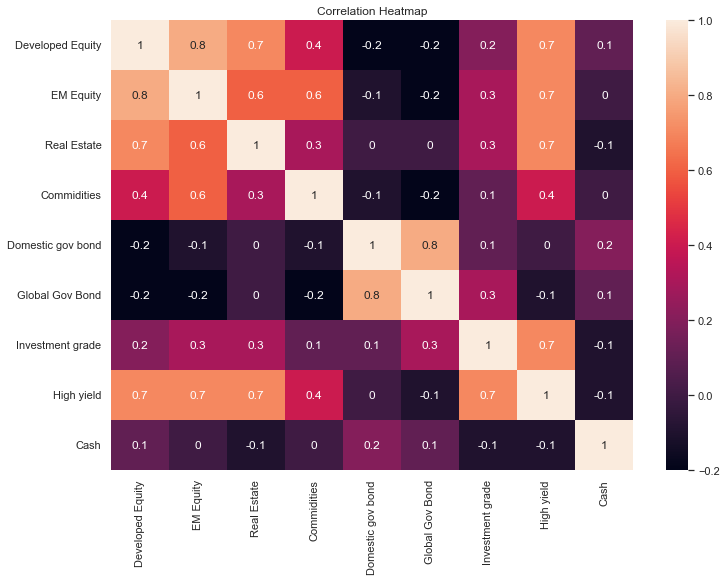

In [44]:
# Correlation_df is now a correlation matrix which we can work with
# Correlation Heatmap to decide sector weightings

plt.title("Correlation Heatmap")
sns.heatmap(Correlation_df,annot=True)

Text(0.5, 1.0, 'Portfolio 7')

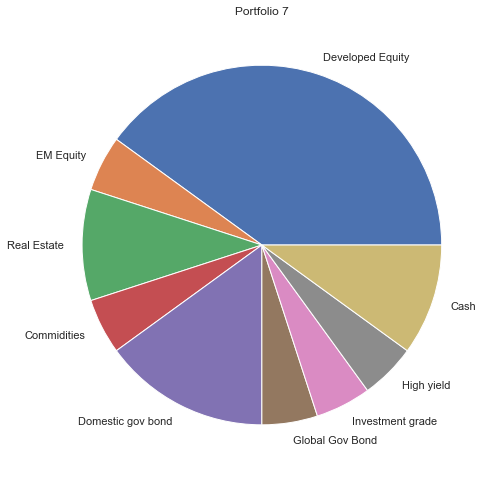

In [61]:
# We made our asset allocation decision based off of the correlation matrix and Client Risk Appetite
# We chose portfolio 6 that had the following return contributions

plt.pie(df2.iloc[7,1:],labels=df2.columns[1:])
plt.title("Portfolio 7")


Developed Equity     2.03
EM Equity            0.00
Real Estate          0.34
Commidities          0.53
Domestic gov bond    0.25
Global Gov Bond      0.10
Investment grade     0.21
High yield           0.16
Cash                 0.16
dtype: float64


Text(0.5, 1.0, 'Portfolio 6 Expected Return Contribution')

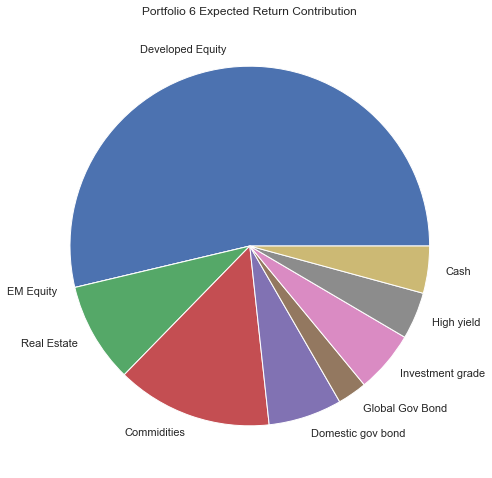

In [60]:
# Return Contributions 
# Series Created with data retrieved from analysis document
index = Correlation_df.columns
data = np.array([2.03,0,0.34,0.53,0.25,0.1,0.21,0.16,0.16])
return_contributions = pd.Series(data, index)
print(return_contributions)

plt.pie(return_contributions, labels=index)
plt.title("Portfolio 6 Expected Return Contribution")